In [3]:
# load datasets
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

X, y = dataset.data, dataset.target

# feature 
feature_names = dataset.feature_names
print(feature_names, '\n')

# Convert to pandas
import pandas as pd

df = pd.DataFrame(dataset.data, columns=feature_names)
df['target'] = dataset.target

print(df.head(), '\n')

print(X.shape)
print(y.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422   

(20640, 8)
(20640,)


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64 

0 

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
target        0.0
dtype: float64 



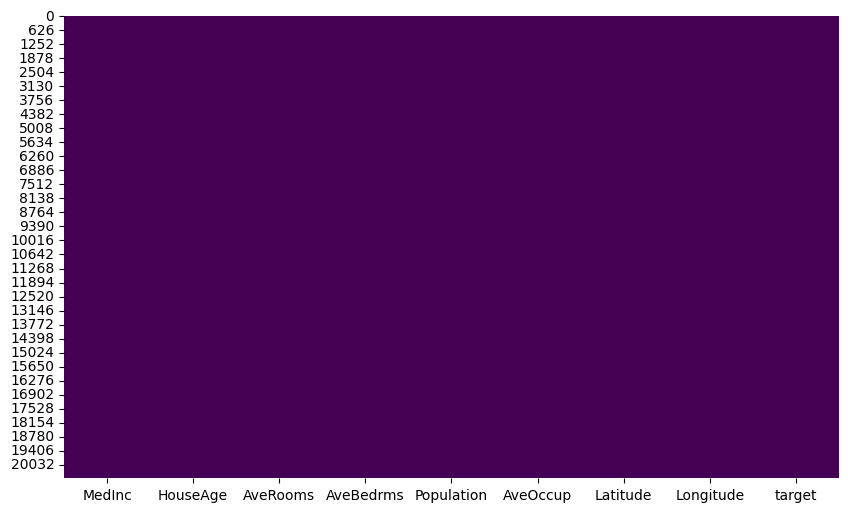

In [5]:
# cek missing values
import seaborn as sns

# cek jumlah missing values per kolom
print(df.isnull().sum(), '\n')

# cek total missing values di dataset
print(df.isnull().sum().sum(), '\n')

# cek presantase missing values
missing_precentage = (df.isnull().sum() / len(df)) * 100
print(missing_precentage, '\n')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


<Figure size 1200x800 with 0 Axes>

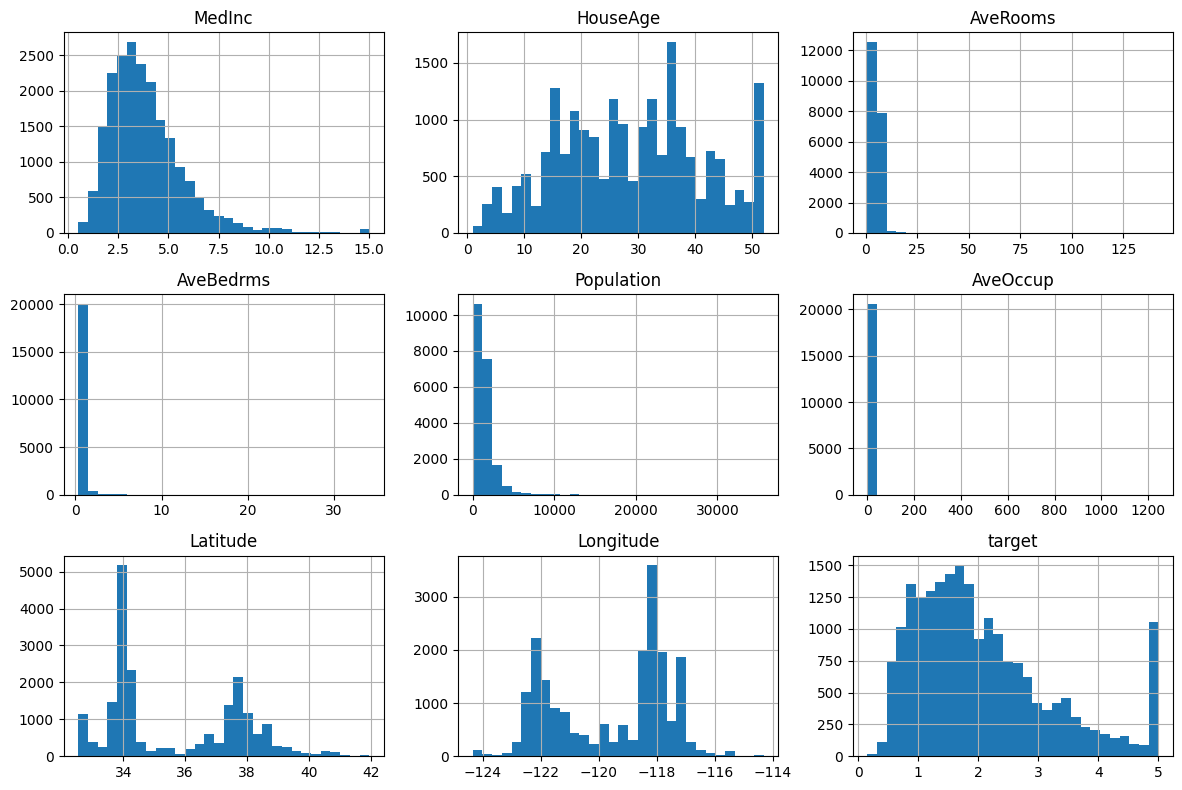

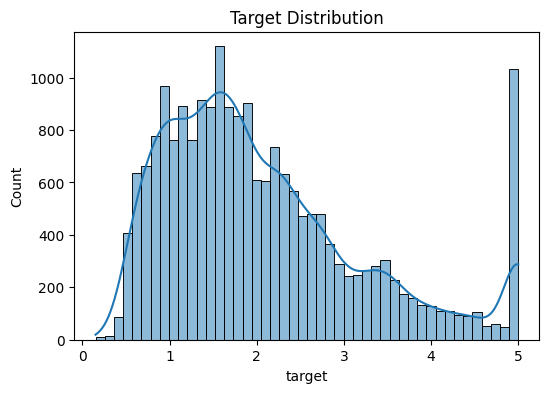

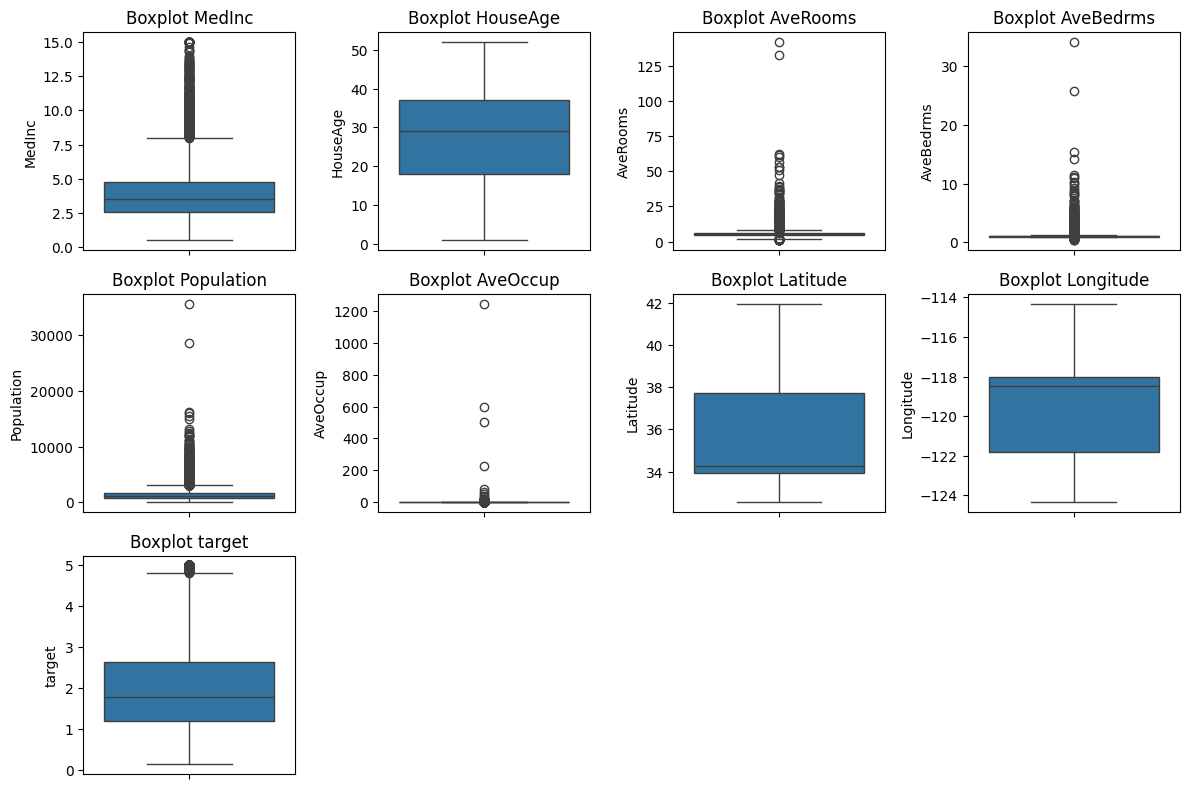

In [6]:
# EDA (Exploratory Data Analysis)

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check distribution of all features
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

# 2. Check target distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['target'], kde=True)
plt.title('Target Distribution')
plt.show()

# 3. Boxplot for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


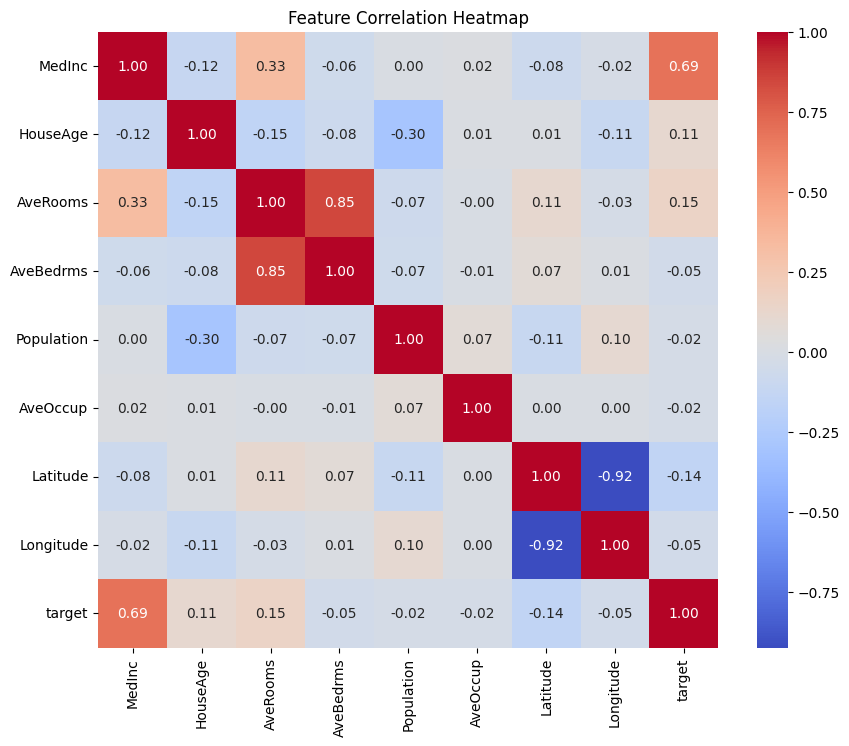

In [7]:
# Check correlation between features

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [8]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# scalling
ss = MinMaxScaler()
X_train_MMS = ss.fit_transform(X_train)
X_test_MMS = ss.transform(X_test)

print(f'\nX_train shape : {X_train_MMS.shape}')
print(f'X_test shape : {X_test_MMS.shape}')


X_train shape : (16512, 8)
X_test shape : (4128, 8)


In [9]:
# Training model Randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train_MMS, y_train)

y_pred = rf.predict(X_test_MMS)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 0.2553632041896477
MAE: 0.3274564256540699
R2: 0.8051270951054924


In [10]:
# Randomizedsearchcv

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 250),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]  # 'auto' dihapus, jadi pakai ini
}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=50, n_jobs=-1, 
    random_state=42, scoring='neg_mean_squared_error', error_score='raise'
)

random_search.fit(X_train_MMS, y_train)

y_pred_random = random_search.predict(X_test_MMS)

print(f'Best Params : {random_search.best_params_}')
print(f'Best score : {random_search.best_score_} \n')
print(f'MSE : {mean_squared_error(y_test, y_pred_random)}')
print(f'MAE : {mean_absolute_error(y_test, y_pred_random)}')
print(f'R2 : {r2_score(y_test, y_pred_random)}')


Best Params : {'max_depth': 49, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
Best score : -0.25069361331748097 

MSE : 0.24889717038364434
MAE : 0.32616793665940047
R2 : 0.8100614582801735


In [11]:
# dump model 

import joblib
joblib.dump(random_search, 'model_california_housing.joblib')

['model_california_housing.joblib']